[Ссылка на форму с вопросами](https://docs.google.com/forms/d/e/1FAIpQLSfBjmzdx-NUArJEf8KvoRoSzPqhtKc7HRzX7T0p_OmKhrsp2w/viewform?usp=sf_link)

### Работа с CSV файлом

#### Считывание CSV файла как текстового файла

In [2]:
# Считывание CSV файла
csvfile = open('titanic.csv', 'r') 
titanic_lst = csvfile.readlines()
len(titanic_lst)

888

In [3]:
# Закроем файл
csvfile.close()

In [4]:
titanic_lst[:5]

['Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare\n',
 '0,3,Mr. Owen Harris Braund,male,22,1,0,7.25\n',
 '1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833\n',
 '1,3,Miss. Laina Heikkinen,female,26,0,0,7.925\n',
 '1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1\n']

In [5]:
titanic_lst[1]

'0,3,Mr. Owen Harris Braund,male,22,1,0,7.25\n'

#### Использование бибилиотеки CSV

In [6]:
# Считывание CSV файла
import csv
csvfile = open('titanic.csv')#, newline=''
titanic_reader = csv.reader(csvfile, delimiter=',')

In [7]:
titanic_lst = []
for row in titanic_reader:
    titanic_lst.append(row)
len(titanic_lst)

888

In [8]:
# Закроем файл
csvfile.close()

In [9]:
titanic_lst[0]

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [10]:
titanic_lst[1]

['0', '3', 'Mr. Owen Harris Braund', 'male', '22', '1', '0', '7.25']

#### Считывание CSV файла в формате словаря

In [11]:
# Считывание CSV файла в формате словаря
import csv
with open('titanic.csv') as csvfile: #, newline=''
    titanic_reader = csv.DictReader(csvfile)

    titanic_lst = []
    for row in titanic_reader:
        titanic_lst.append(row)
    print(len(titanic_lst))

887


In [12]:
titanic_lst

[{'Age': '22',
  'Fare': '7.25',
  'Name': 'Mr. Owen Harris Braund',
  'Parents/Children Aboard': '0',
  'Pclass': '3',
  'Sex': 'male',
  'Siblings/Spouses Aboard': '1',
  'Survived': '0'},
 {'Age': '38',
  'Fare': '71.2833',
  'Name': 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
  'Parents/Children Aboard': '0',
  'Pclass': '1',
  'Sex': 'female',
  'Siblings/Spouses Aboard': '1',
  'Survived': '1'},
 {'Age': '26',
  'Fare': '7.925',
  'Name': 'Miss. Laina Heikkinen',
  'Parents/Children Aboard': '0',
  'Pclass': '3',
  'Sex': 'female',
  'Siblings/Spouses Aboard': '0',
  'Survived': '1'},
 {'Age': '35',
  'Fare': '53.1',
  'Name': 'Mrs. Jacques Heath (Lily May Peel) Futrelle',
  'Parents/Children Aboard': '0',
  'Pclass': '1',
  'Sex': 'female',
  'Siblings/Spouses Aboard': '1',
  'Survived': '1'},
 {'Age': '35',
  'Fare': '8.05',
  'Name': 'Mr. William Henry Allen',
  'Parents/Children Aboard': '0',
  'Pclass': '3',
  'Sex': 'male',
  'Siblings/Spouses Aboard': '0',
  'Sur

In [13]:
# Воспользуемся библиотекой collections (фреймворк специальных типов структур данных)
from collections import defaultdict
titanic_dict = defaultdict(list)
for row in titanic_lst:
    for item in row.items():
        titanic_dict[item[0]].append(item[1])
len(titanic_dict)


8

In [14]:
titanic_dict.keys()

['Fare',
 'Parents/Children Aboard',
 'Name',
 'Age',
 'Pclass',
 'Sex',
 'Siblings/Spouses Aboard',
 'Survived']

In [15]:
len(titanic_dict['Survived']), titanic_dict['Survived'][:10]


(887, ['0', '1', '1', '1', '0', '0', '0', '0', '1', '1'])

In [16]:
### Задание для самостоятельного решения № 1 ###
# .........................................
# Преобразуйте колонку 'Survived' в тип int без применения библиотеки numpy. Сумму по всему столбцу запишите 
# в поле ответа. 
# .........................................
sum(map(int,titanic_dict['Survived']))

342

#### Запись CSV Файла

In [17]:
# Запишем в файл транспонированый датасет "titanic"
filename = 'titanic_T.csv'
with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile,  delimiter=',')
    for k in titanic_dict.keys():
        csvwriter.writerow([k] + titanic_dict[k])

### Numpy - библиотека для работы с массивами

In [18]:
import numpy as np

In [19]:
type(titanic_dict['Pclass'])

list

In [20]:
# Число уникальных значений
for k in titanic_dict.keys():
    unique = np.unique(titanic_dict[k])
    if unique.size < 10:
        print(k+': ', np.unique(titanic_dict[k]))
    else:
        print(k+': ', np.unique(titanic_dict[k])[:10])
    #print(k+': ', np.unique(titanic_dict[k])) if unique.size < 10 else print(k+': ', np.unique(titanic_dict[k])[:10])

('Fare: ', array(['0', '10.1708', '10.4625', '10.5', '10.5167', '106.425', '108.9',
       '11.1333', '11.2417', '11.5'], dtype='|S8'))
('Parents/Children Aboard: ', array(['0', '1', '2', '3', '4', '5', '6'], dtype='|S1'))
('Name: ', array(['Capt. Edward Gifford Crosby', 'Col. John Weir',
       'Col. Oberst Alfons Simonius-Blumer', 'Don. Manuel E Uruchurtu',
       'Dr. Alfred Pain', 'Dr. Alice (Farnham) Leader',
       'Dr. Arthur Jackson Brewe', 'Dr. Ernest Moraweck',
       'Dr. Henry William Frauenthal', 'Dr. Max Stahelin-Maeglin'],
      dtype='|S81'))
('Age: ', array(['0.42', '0.67', '0.75', '0.83', '0.92', '1', '10', '11', '12',
       '13'], dtype='|S4'))
('Pclass: ', array(['1', '2', '3'], dtype='|S1'))
('Sex: ', array(['female', 'male'], dtype='|S6'))
('Siblings/Spouses Aboard: ', array(['0', '1', '2', '3', '4', '5', '8'], dtype='|S1'))
('Survived: ', array(['0', '1'], dtype='|S1'))


In [21]:
# Преобразуем типы целых и вещественных колонок
for t, columns in {'int':['Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], 
                   'float':['Age', 'Fare']}.items():
    for col in columns:
        titanic_dict[col] = np.array(titanic_dict[col]).astype(t)

In [22]:
titanic_dict['Survived'][:10], titanic_dict['Age'][:10]

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1]),
 array([22., 38., 26., 35., 35., 27., 54.,  2., 27., 14.]))

In [23]:
# Кол-во пассажиров / кол-во выживших
titanic_dict['Survived'].size, titanic_dict['Survived'].sum()

(887, 342)

In [24]:
# Округлим стоимость билета до десятых долей.
np.round(titanic_dict['Fare'], 1)[:10]

array([ 7.2, 71.3,  7.9, 53.1,  8. ,  8.5, 51.9, 21.1, 11.1, 30.1])

In [109]:
### Задание для самостоятельного решения № 2 ###
# .........................................
# Посчитайте количество пассажиров с родственниками ('Siblings/Spouses Aboard') в количетсве более 3.
# .........................................
cnt = 0
for i in titanic_dict['Siblings/Spouses Aboard']:
    if i>3:
        cnt += 1
print(cnt)
#titanic_dict['Siblings/Spouses Aboard']

30


### Простые статистики

In [26]:
# Максимальный, минимальный, средний возраст, стоимость билета
for feature in ['Age', 'Fare']:
    print(feature+'\n  max: {}, min: {}, mean: {}, median: {}, std: {}'.format(np.round(titanic_dict[feature].max(), 2), 
                                                                               np.round(titanic_dict[feature].min(), 2),
                                                                               np.round(titanic_dict[feature].mean(), 2),
                                                                               np.round(np.median(titanic_dict[feature]), 2),
                                                                               np.round(titanic_dict[feature].std(), 2)
                                                                               ))

Age
  max: 80.0, min: 0.42, mean: 29.47, median: 28.0, std: 14.11
Fare
  max: 512.33, min: 0.0, mean: 32.31, median: 14.45, std: 49.75


### Фильтрация по усолвию

In [27]:
# Количество пассажиров разного класса
np.unique(titanic_dict['Pclass'], return_counts=True)

(array([1, 2, 3]), array([216, 184, 487], dtype=int64))

In [108]:
# Количество выживших по классам
for pcls in np.unique(titanic_dict['Pclass']):
    survived = titanic_dict['Survived'][np.where(titanic_dict['Pclass']==pcls)[0]]
    #print survived
    uniq, cnt = np.unique(survived, return_counts=True)
    print(uniq, cnt)
    print('Доля выживших пассажиров {}-го класса: {}'.format(pcls, cnt[1]/survived.size))

(array([0, 1]), array([ 80, 136], dtype=int64))
Доля выживших пассажиров 1-го класса: 0
(array([0, 1]), array([97, 87], dtype=int64))
Доля выживших пассажиров 2-го класса: 0
(array([0, 1]), array([368, 119], dtype=int64))
Доля выживших пассажиров 3-го класса: 0


In [110]:
### Задание для самостоятельного решения № 3 ###
# .........................................
# Вычислите средний возраст мужчин и женщин и долю выживших по полу. 
# (Имейте в виду, что функция np.where не умеет работать с типом string)
# .........................................
#np.unique(titanic_dict['Sex'], return_counts=True)
age_m, age_w = 0, 0
cnt_m, cnt_w = 0., 0.

for i in range(len(titanic_dict['Sex'])):
    if titanic_dict['Sex'][i] == 'male':
        age_m += titanic_dict['Age'][i] 
        if titanic_dict['Survived'][i] == 1:
            cnt_m += 1
    else:
        if titanic_dict['Survived'][i] == 1:
            cnt_w += 1
        age_w += titanic_dict['Age'][i]
        
avg_m = age_m/titanic_dict['Sex'].count('male')
avg_w = age_w/titanic_dict['Sex'].count('female')
print avg_m, avg_w
#print cnt_m, cnt_w

part_m = cnt_m/titanic_dict['Sex'].count('male')
part_w = cnt_w/titanic_dict['Sex'].count('female')
print part_m, part_w
#np.where(titanic_dict['Sex'] == 'male')

30.431361256544506 27.719745222929937
0.190226876091 0.742038216561


### Matplotlib

In [31]:
import matplotlib.pyplot as plt

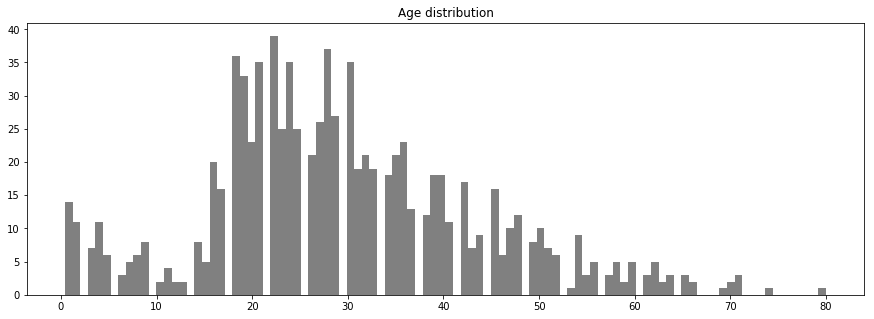

In [32]:
# Гистограмма распределения возрастов 
plt.figure(figsize=(15,5))
plt.hist(titanic_dict['Age'], bins=100, color='grey');
plt.title('Age distribution');
plt.show();

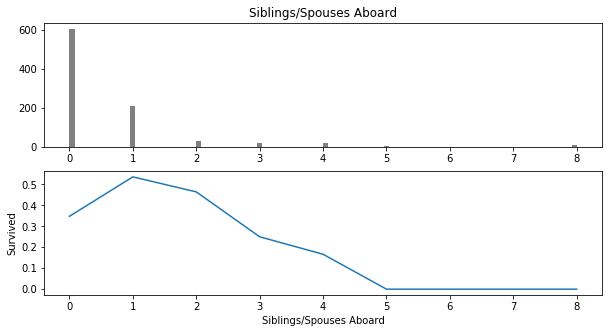

In [33]:
# Определим долю выживших для уникальных значений признака 'Siblings/Spouses Aboard'
relatives_num = np.unique(titanic_dict['Siblings/Spouses Aboard'])
relatives_num = np.sort(relatives_num)
survived_total = []
for i in relatives_num:
    survived = titanic_dict['Survived'][np.where(titanic_dict['Siblings/Spouses Aboard'] == i)[0]]
    survived_total.append(survived.sum()*1./survived.size)
    
# Построим распределение признака 'Siblings/Spouses Aboard' и зависимость выживаемости от числа родственников 
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.hist(titanic_dict['Siblings/Spouses Aboard'], bins=100, color='grey');
plt.title('Siblings/Spouses Aboard');

plt.subplot(2,1,2)
plt.plot(relatives_num, survived_total);
plt.xlabel('Siblings/Spouses Aboard');
plt.ylabel('Survived')

plt.show();

In [34]:
# Сформируем массив выживаемости для каждого класса
survived_lst = []
for pcls in np.unique(titanic_dict['Pclass']):
    survived = np.array(titanic_dict['Survived'])[np.where(titanic_dict['Pclass']==pcls)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    survived_lst.append(cnt)
    print('PClass {}: {}'.format(pcls, cnt))

PClass 1: [ 80 136]
PClass 2: [97 87]
PClass 3: [368 119]


In [35]:
# Преобразуем список списков survived_lst в двумерный массив
survived_arr = np.array(survived_lst)
survived_arr

array([[ 80, 136],
       [ 97,  87],
       [368, 119]], dtype=int64)

<type 'numpy.ndarray'>


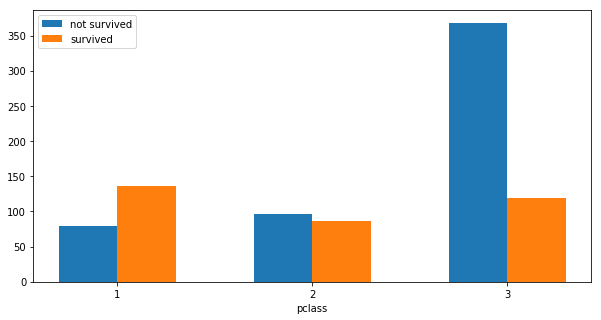

In [57]:
# Построим зависимость выживаемости пассажира от класса (Pclass)
pclass_lst = np.arange(1, np.unique(titanic_dict['Pclass']).size + 1)
#print type(pclass_lst)
width = 0.3
plt.figure(figsize=(10,5))
plt.bar(pclass_lst - width/2, survived_arr[:,0], width, label='not survived')
plt.bar(pclass_lst + width/2, survived_arr[:,1], width, label='survived')
plt.xlabel('pclass')
plt.legend(['not survived', 'survived'])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()

### Распределение для мужчин

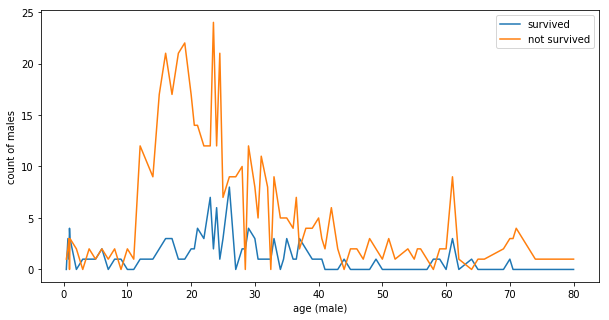

In [77]:
### Задание для самостоятельного решения № 4 ###
# .........................................
# Построить распределения возрастов мужчин и женщин в отдельных графиках и 
# раскрасить выживших и не выживших в разные цвета
# .........................................

age_m, age_w = [], []# age_m stores all ages of males (age_w - the dsme for females)
ind_m, ind_w = [], []#ind_m keeps indexes of males (ind_w- the same for females)

for i in range(len(titanic_dict['Sex'])):
    if titanic_dict['Sex'][i] == 'male':
        ind_m.append(i)
        age_m.append(titanic_dict['Age'][i])
    else:
        ind_w.append(i)
        age_w.append(titanic_dict['Age'][i])
        
tmp1 = list(set(age_m))# unique male ages array
tmp1.sort()
tmp2 = list(set(age_w))# unique female ages array
tmp2.sort()

live_m = dict.fromkeys(tmp1,0)# dict of alive males
died_m = dict.fromkeys(tmp1,0)# dict of died males

for i in ind_m:
    if titanic_dict['Survived'][i] == 1:
        live_m[titanic_dict['Age'][i]] += 1
    else:
        died_m[titanic_dict['Age'][i]] += 1

plt.figure(figsize=(10,5))
plt.plot(tmp1,live_m.values(),tmp1,died_m.values())
plt.xlabel('age (male)')
plt.ylabel('count of males')
plt.legend(['survived', 'not survived'])

plt.show()

### Распределение для женщин



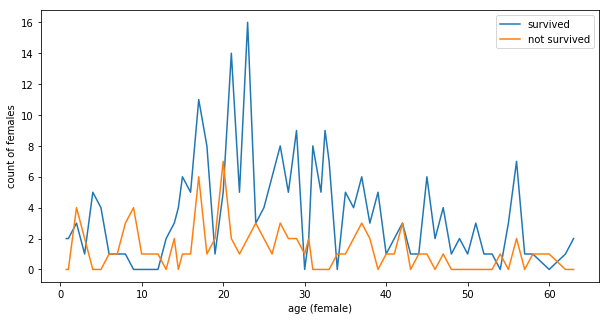

In [75]:
live_w = dict.fromkeys(tmp2,0)# dict of alive females
died_w = dict.fromkeys(tmp2,0)# dict of died females

for i in ind_w:
    if titanic_dict['Survived'][i] == 1:
        live_w[titanic_dict['Age'][i]] += 1
    else:
        died_w[titanic_dict['Age'][i]] += 1

plt.figure(figsize=(10,5))
plt.plot(tmp2,live_w.values(),tmp2,died_w.values())

plt.xlabel('age (female)')
plt.ylabel('count of females')
plt.legend(['survived', 'not survived'])

plt.show()

### Работа с текстовыми данными

In [39]:
# Дополнительный признак: обращение к человеку
# Обращение ставится в начале имени и отделяется точкой.
appeal = np.unique([f.split('.')[0] for f in titanic_dict['Name']], return_counts=True)
for name, cnt in zip(appeal[0], appeal[1]):
    print(str(name)+': '+str(cnt))

Capt: 1
Col: 2
Don: 1
Dr: 7
Jonkheer: 1
Lady: 1
Major: 2
Master: 40
Miss: 182
Mlle: 2
Mme: 1
Mr: 513
Mrs: 125
Ms: 1
Rev: 6
Sir: 1
the Countess: 1


In [40]:
# Выведем список детей мужского пола
[f for f in titanic_dict['Name'] if 'Master' in f][:10]

['Master. Gosta Leonard Palsson',
 'Master. Eugene Rice',
 'Master. Juha Niilo Panula',
 'Master. William Frederick Goodwin',
 'Master. Harald Skoog',
 'Master. Gerios Moubarek',
 'Master. Alden Gates Caldwell',
 'Master. Elias Nicola-Yarred',
 'Master. Thomas Henry Sage',
 'Master. Eino Viljami Panula']

In [41]:
titanic_dict['Master'] = [int('Master' in f) for f in titanic_dict['Name']]
np.unique(titanic_dict['Master'], return_counts=True)

(array([0, 1]), array([847,  40], dtype=int64))

In [42]:
### Задание для самостоятельного решения ###
# .........................................
# Создать признак признак замужняя, незамужняя, остальные и построить распределение выживаемости
# .........................................

In [83]:
# 0 - not married
# 1 - married
# -1 - others

new_atr = []

for i in titanic_dict['Name']:
    appeal = i.split('.')
    if 'Miss' in appeal:
        new_atr.append(0)
    elif 'Mrs' in appeal:
        new_atr.append(1)
    else:
        new_atr.append(-1)
titanic_dict.update({'Status':new_atr})

In [105]:
# Сформируем массив выживаемости для каждого класса
survived_lst = []
for sts in np.unique(titanic_dict['Status']):
    survived = np.array(titanic_dict['Survived'])[np.where(titanic_dict['Status']==sts)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    survived_lst.append(cnt)
    print('Status {}: {}'.format(sts, cnt))

Status -1: [464 116]
Status 0: [ 55 127]
Status 1: [26 99]


In [106]:
# Преобразуем список списков survived_lst в двумерный массив
survived_arr = np.array(survived_lst)
survived_arr

array([[464, 116],
       [ 55, 127],
       [ 26,  99]], dtype=int64)

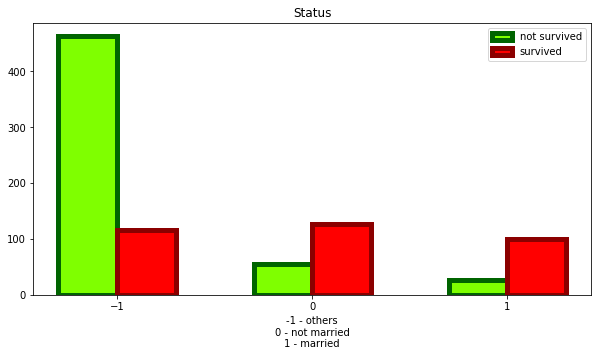

In [107]:
# Построим зависимость выживаемости пассажира от класса (Pclass)
status_lst = np.array([-1,0,1])#np.arange(1, np.unique(titanic_dict['Status']).size + 1)
#print type(pclass_lst)
width = 0.3
plt.figure(figsize=(10,5))
plt.bar(status_lst - width/2, survived_arr[:,0], width, label='not survived',color = 'chartreuse',edgecolor = 'darkgreen', linewidth = 5)
plt.bar(status_lst + width/2, survived_arr[:,1], width, label='survived',color = 'red', edgecolor = 'darkred',linewidth = 5)
plt.xlabel('-1 - others\n0 - not married\n1 - married')
plt.title('Status')
plt.legend(['not survived', 'survived'])



ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()